# Explaining Black-Boxes: Neural Networks

## Introduction

Neural networks are often considered to be complex and difficult to interpret due to their highly non-linear nature. However, with the right tools and techniques, it is possible to make neural networks more interpretable. One approach is to use techniques such as visualization of the network's weights, activations, and gradients, which can help to understand the relationships between inputs and outputs. Additionally, there are also interpretable neural network architectures, such as decision trees or rule-based systems, that are designed to be more easily interpretable than traditional neural networks.

In this lesson, we will discuss some of the techniques available to interpret or explain neural networks. Then, we will build a neural network together with scikit-learn and explain the results using the techniques that we learned. You can use this code as a template in the future to create neural networks and output useful reports to explain your results.

## Objectives

You will be able to:

* Describe methods for interpreting/explaining neural networks
* Build and interpret a neural network with scikit-learn

## Wisconsin Breast Cancer Dataset
Since neural networks have many applications in the medical field, a good dataset to explore is the Wisconsin Breast Cancer Dataset. This is a dataset with 569 instances, 30 features, and 2 classes. In this exercise, we will use scikit-learn to practice building a neural network that is used to classify whether a breast cancer tumor is benign or malignant. 

Researchers and physicians rely on neural networks to help them diagnose malignant tumors due to the high degree of accuracy they offer. However, medical professionals need to have a detailed understanding of how the model arrived at its conclusions. After we build our neural network, we will review all of the explanatory metrics we can use to support our model's results.


## Implement a Neural Network with scikit-learn
Follow the steps below to build a simple neural network with scikit-learn! Remember, that even as we build out our model, we will be looking for valuable information that we can use to better explain our results.

### 1. Import Data
In the cell below, we use an `from <library>.<module> import <object>` syntax to import the necessary function to load our data. Then, we assign it to the `data` variable. 

In [1]:
from sklearn.datasets import load_breast_cancer

# load the dataset
data = load_breast_cancer()

### 2. Basic EDA

In [2]:
# print the dataset description
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In the data description, you will notice that there is a __Dataset Characteristics__ section that provides valuable metadata that will help you to assess the data quality and interpret the features. 

#### Examining Data Quality
Since this is an example dataset that is used for teaching, it is probably not used to train neural networks in contemporary medical settings, so there are certain things we will excuse in this exercise.

* __Size__ - Due to limitations on compute resources outside of professional research settings, this dataset is intentionally much smaller than what would be used in real medical research.

* __Age__ - This dataset is from 1995, which would generally be a bit too old for contemporary research on this topic.

On the other hand, __there are things about this dataset that are _unusually_ good, such as a lack of missing values__. In a research setting, careful data preparation decisions would need to be made, and those decisions would need to be part of your explanation. 

#### Examining Features
Feature selection is an important part of model interpretation. By including certain features in a model, researchers are have already indicated that these features are important. While selection methods might vary, the presence or absence of features already provides many clues to interpretation. 

Our __target__ feature has two classes, malignant or benign. 

You may have noticed that ten attributes of the cell nuclei present in the image are described. Each of these attributes are represented as three calculated features, described below:

> "The mean, standard error, and "worst" or largest (mean of the three
worst/largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 0 is Mean Radius, field
10 is Radius SE, field 20 is Worst Radius."

This means that, for example, the __radius__ attribute translates into the features __Radius (Mean)__, __Radius (SE Mean)__, and __Radius (Worst)__. __Worst__ describes the mean radius of the three largest cell nuclei. 

##### So what can we infer?
Based on the description of the features, and what we know about the computed features, we can draw a couple of inferences about the components of the decision mechanism our model might employ, specifically:
1. The attributes selected by researchers to be included in the data have been determined to be relevant in diagnosing malignancy mammograms.
2. Since "worst" is used to describe the largest cell nuclei in the observed sample, there is some relationship between malignancy and cell nuclei size.

For ease of use, we provide a list of the feature names below.

In [3]:
feature_names = ["id", "radius_mean", "texture_mean", "perimeter_mean", 
                 "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", 
                 "concave points_mean", "symmetry_mean", "fractal_dimension_mean", 
                 "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", 
                 "compactness_se", "concavity_se", "concave points_se", "symmetry_se", 
                 "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", 
                 "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", 
                 "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]

#### Detecting Class Imbalance
Next, we will assign the data and the targets to X, y variables. Then, we will examine the distribution of our target class. 

In [4]:
# assign the feature matrix and target vector
X = data.data
y = data.target

In [5]:
import pandas as pd

y_data = pd.Series(y)
print(y_data.value_counts())

1    357
0    212
dtype: int64


It appears from the output above that our target class is over-represented in this data. This will be something to consider as we interpret our results.

### 3. Build a Neural Network
Next, we will use the `scikit-learn` neural network library and import the `MLPClassifier`.

The MLP Classifier in scikit-learn is implemented as a multi-layer feedforward neural network with a backpropagation algorithm for training the network. Before we continue, let's briefly define what that means:

* In a feedforward neural network, each neuron in the network receives input from the neurons in the previous layer, performs a computation, and passes the result to the neurons in the next layer.
* The main goal of training a feedforward neural network is to adjust the weights of the connections between the neurons so that the network can accurately map the input to the desired output. 
* This is typically done using a supervised learning algorithm, such as backpropagation, which iteratively updates the weights of the network to minimize the error between the network's predicted output and the true output.

The MLPClassifier function has several parameters that can be used to control the behavior of the algorithm, such as the number of hidden layers, the number of neurons in each layer, the activation function, and the learning rate.

#### Tuning Parameters
Below, we discuss a few parameters that we will tune to create our model.

For a more detailed explanation of all the possible parameters and how you can tune them, take a look at the [scikit-learn documentation] (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).


`__hidden_layer_sizes__`: This parameter controls the number of neurons in each hidden layer and the number of hidden layers in the network. It is represented as a tuple, where each element of the tuple represents the number of neurons in a hidden layer. For example, (100, 100) would create a network with two hidden layers, each with 100 neurons. We are going to use a small number of nodes for demonstration purposes.

`max_iter`: This parameter controls the maximum number of iterations that the solver will run before stopping.

`solver`: This parameter controls the algorithm used to train the network. The most commonly used solvers are we are using `sgd` or __Stochastic Gradient Descent__ beca

In [6]:
from sklearn.neural_network import MLPClassifier

# create an instance of the classifier
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, 
                    solver='sgd', random_state=1, learning_rate_init=.1)

#### Train, Test, Split
Next, let's use the `model_selection` module to creating training and test sets for our model.

In [7]:
from sklearn.model_selection import train_test_split

# split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the classifier on the train dataset
clf.fit(X_train, y_train)

# predict labels for test dataset
y_pred = clf.predict(X_test)

Great! Now, let's review and explain the results.

## Interpreting/Explaining Neural Networks

There are several ways to interpret and explain the results of a neural network. These methods can provide insight into how the neural network is making predictions and how different features are impacting those predictions, which can be useful for understanding the model's behavior and potentially improving it. In the section below, we will demonstrate how to to apply these techniques with Python and scikit-learn.

When interpreting machine learning models, there are methods for __local__ and __global__ interpretation. Global explanations attempt to explain the behavior of the entire model and generalize about how the model decides. Local explanations explain the results of a single observations. First, we will explain some global interpretation methods. Then, we will explain some local interpretation methods. 

### Global Explanations

#### Model Evaluation Metrics
You can use various evaluation metrics such as accuracy, precision, recall, and F1-score to evaluate the performance of the model on the test dataset. 

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

# Compute precision
prec = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(prec * 100))

# Compute recall
rec = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(rec * 100))

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}%".format(f1 * 100))

Accuracy: 62.28%
Precision: 62.28%
Recall: 100.00%
F1 Score: 76.76%


While the accuracy of our model is low, we have already learned a lot about how the model is classifying the observations. A recall of 100% means that __every negative prediction is correct__. 

#### Confusion Matrix
You can use a confusion matrix to visualize the performance of the model in terms of true positives, true negatives, false positives, and false negatives.

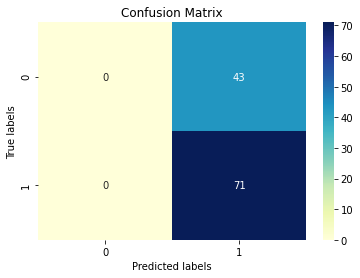

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##### So what can we infer?
The model is "cautious" in determining that an observation is __benign__. The model is more likely to misclassify a negative result as positive. 

### Local Explanations

#### LIME
You can use __LIME (Local Interpretable Model-Agnostic Explanations)__ to generate explanations for the predictions of the model by approximating the model locally around one instance (row) and explaining the predictions based on that local approximation. Let's run the code and examine the outputs so we can talk about what that means.

Since LIME is model agnostic, you can use it with any machine learning model. However, you will want to choose an evaluation metric based on the type of metrics available to that particular model. We chose `predict_proba` as our evaluation metric because it is a useful way to evaluate features when using neural networks. It can give you more information about a model's predictions than the simple `predict` method. This is because it helps us to understand the level of certainty of a model's predictions for each feature by predicting the probability that the row in question will belong to either class.

In [10]:
# !pip install lime

In [11]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names)

# Choose a sample to explain
sample = X_test[0]

# Get the explanation for the sample
exp = explainer.explain_instance(sample, clf.predict_proba, num_features=5)

# # Print the explanation
# exp_data = exp.as_list()

# exp_df = pd.DataFrame(exp_data)

Let's discuss this code block and what it is doing.

1. In the code above, we use the `lime_tabular.LimeTabularExplainer()` class to create a LIME explainer for the training data. You can pass the number of feature you want to see the explanation for using `num_features` parameter.

2. Next, we choose a sample from the test set (`X_test[0]`) and use the explain_instance() method to obtain an explanation for the prediction of the sample. 

3. Finally, we use the as_list() method to print the explanation as a list of feature-value pairs.

__You can also visualize the explanation:__


<div>
<table><tr><td>
<img src="https://curriculum-content.s3.amazonaws.com/data-science/v3/p4/w2-ml-interp/ml-interp-4-2.png" 
    alt="A LIME explainer generated by the Python LIME module. Depicts a chart that displays the probability that a specific row in the data belonged to either class, based on predicted probabilities." height=350/>
</td></tr></table>
</div>

__If you are running this notebook locally, and want to generate the visualization for yourself, uncomment and run the code cell below.__

In [12]:
# exp.show_in_notebook(show_table=True, show_all=False)

So what does this graph suggest? Let's examine the pieces from left to right. 

1. In the top left, the prediction probabilities for the observation (which is the first row in the data frame or 0) are displayed. In this case, the probability that this observation is indeed malignant is 0.62, while the probability that it is benign is only 0.38.

2. In the center, the bar divides features into two columns: `0`, or features that would typically be associated with benign, and `1`, or features that would typically be associated with malignant. Here, we see that the only feature in `1` is `fractal_dimension mean_` which is greater than 0.32 but less than 0.47. In this row, the true value was 0.40.

3. On the right, there is another table with columns named `Feature` and `Value`. The `fractal_dimension_mean` feature is highlighted in orange, with the true value displayed next to it. 

##### So what can we infer?
The model is _mildly_ confident that this observation is malignant, because of the `fractal_dimension_feature`. However, because the observation has values for other features that are typically associated with benign, the confidence of the model is somewhat diminished.

Let's look at another visualization that further explains these results:

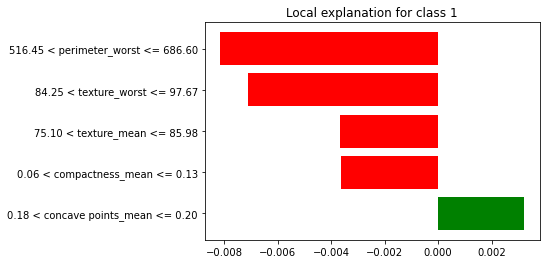

In [13]:
import matplotlib as pyplot
fig = exp.as_pyplot_figure(label=1)

##### So what can we infer?
In the chart above, we see that `fractal_dimension_mean` was the main contributor to the classification of malignant. and that `perimeter_worst` was the main contributor to uncertainty about the classification. 

Below, we express the same values as a table. 

In [14]:
pd.DataFrame(exp.as_list(),columns=['Feature','Contribution'])

,Feature,Contribution
0,516.45 < perimeter_worst <= 686.60,-0.008154
1,84.25 < texture_worst <= 97.67,-0.007095
2,75.10 < texture_mean <= 85.98,-0.003677
3,0.06 < compactness_mean <= 0.13,-0.003620
4,0.18 < concave points_mean <= 0.20,0.003230


## Combining Explanations

Let's look at the inferences that we made so far:

1. The attributes selected by researchers to be included in the data have been determined to be relevant in diagnosing malignancy mammograms.
2. Since "worst" is used to describe the largest cell nuclei in the observed sample, there is some relationship between malignancy and cell nuclei size.
3. There are more observations that are malignant.
4. The model is "cautious" in determining that an observation is __benign__. The model is more likely to mis-classify a negative result as positive. 
5. In our sample, the model is _mildly_ confident that this observation is malignant, because of the `fractal_dimension_mean`. However, because the observation has values for other features that are typically associated with benign, the confidence of the model is somewhat diminished.

Based on the inferences, we might explain that:

1. Since the researchers have indicated that "worst" pertains to "largest", we understand that having larger values in key fields contributes to a malignancy classification.

2. The recall is 100%, which means that false positives are more likely than false negatives. However, that could be due to a class imbalance. 

3. However, we have observed that in a particular sample, that the `fractal_dimension_mean` was a strong contributor to a malignancy classification.

Now that we have created a baseline model and examined the results to craft an explanation, our work is not yet done. Since we have a class imbalance and a recall of 100%, our next iteration might include applying preprocessing techniques to correct for the class imbalance. We might also choose to tune the hyper-parameters of neural network or LIME explainer to improve the model's performance and/or explanations.  

## Summary

In this lesson, we built a neural network to classify observations as "malignant" or "benign" with the Wisconsin Breast Cancer Dataset. We reviewed the metadata and learned which attributes the features represented, and how they were calculated. We also discussed what qualities of the data we should consider when selecting a model and tuning the parameters. 

While we only had time to cover the absolute basics implementing neural networks with Python and scikit-learn, the tools we explained should help you get started. If you are interested in learning more about neural networks, additional curriculum will be provided at the end of the course to help you expand your understanding. 